# Efficiently searching for optimal tuning parameters
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

## Review of K-fold cross-validation

Steps for cross-validation:

- Dataset is split into K "folds" of **equal size**
- Each fold acts as the **testing set** 1 time, and acts as the **training set** K-1 times
- **Average testing performance** is used as the estimate of out-of-sample performance

Benefits of cross-validation:

- More **reliable** estimate of out-of-sample performance than train/test split
- Can be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**

Drawbacks of cross-validation:

- Can be computationally **expensive**

## Review of parameter tuning using `cross_val_score`

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [5]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [118]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [119]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [116]:
y[:5]

array([0, 0, 0, 0, 0])

In [9]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [10]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [11]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Cross-Validated Accuracy')

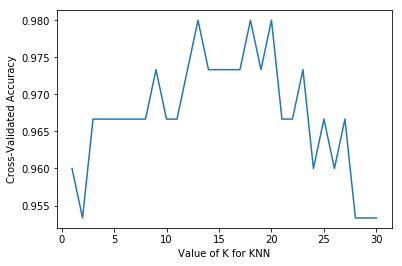

In [12]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [14]:
from sklearn.model_selection import GridSearchCV

In [17]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [18]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [19]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

- You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS)

In [20]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
# view the complete results (list of named tuples)
grid.grid_scores_

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [43]:
scores_param = grid.cv_results_['params']
scores_param

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20},
 {'n_neighbors': 21},
 {'n_neighbors': 22},
 {'n_neighbors': 23},
 {'n_neighbors': 24},
 {'n_neighbors': 25},
 {'n_neighbors': 26},
 {'n_neighbors': 27},
 {'n_neighbors': 28},
 {'n_neighbors': 29},
 {'n_neighbors': 30}]

In [30]:
scores_std = grid.cv_results_['std_test_score']
scores_std

array([ 0.05333333,  0.05206833,  0.04472136,  0.04472136,  0.04472136,
        0.04472136,  0.04472136,  0.04472136,  0.03265986,  0.04472136,
        0.04472136,  0.03265986,  0.0305505 ,  0.04422166,  0.03265986,
        0.03265986,  0.03265986,  0.0305505 ,  0.03265986,  0.0305505 ,
        0.03333333,  0.03333333,  0.03265986,  0.04422166,  0.03333333,
        0.04422166,  0.04472136,  0.04268749,  0.04268749,  0.04268749])

In [28]:
import numpy as np
mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores

array([ 0.96      ,  0.95333333,  0.96666667,  0.96666667,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.97333333,  0.96666667,
        0.96666667,  0.97333333,  0.98      ,  0.97333333,  0.97333333,
        0.97333333,  0.97333333,  0.98      ,  0.97333333,  0.98      ,
        0.96666667,  0.96666667,  0.97333333,  0.96      ,  0.96666667,
        0.96      ,  0.96666667,  0.95333333,  0.95333333,  0.95333333])

In [45]:
# examine the first tuple
print(scores_param[0])
print(mean_scores[0])
print(scores_std[0])


{'n_neighbors': 1}
0.96
0.0533333333333


In [51]:
# create a list of the mean scores only
grid_mean_scores = [result for result in np.array(grid.cv_results_['mean_test_score'])]
print(grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Cross-Validated Accuracy')

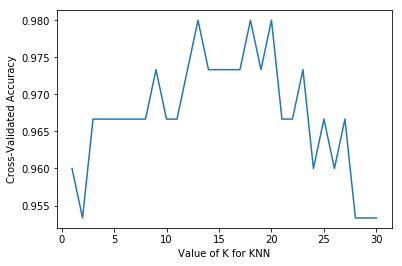

In [52]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [55]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [57]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [58]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [59]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score='True')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='accuracy', verbose=0)

## String result to pandas DataFrame

In [99]:
import pandas as pd

In [100]:
result = pd.DataFrame(grid.cv_results_)

In [101]:
result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001563,0.000101,0.960000,1.000000,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",52,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.000000,0.004688,3.027678e-04,0.053333,0.000000
1,0.000100,0.000100,0.960000,1.000000,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",52,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.000000,0.000200,3.006935e-04,0.053333,0.000000
2,0.000000,0.001563,0.953333,0.978519,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",57,1.0,0.970370,...,0.933333,0.977778,1.0,0.977778,1.0,0.977778,0.000000,4.689145e-03,0.052068,0.005185
3,0.000000,0.003176,0.960000,1.000000,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",52,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.000000,0.000000,6.353387e-03,0.053333,0.000000
4,0.000602,0.001002,0.966667,0.960741,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",29,1.0,0.955556,...,1.000000,0.955556,1.0,0.955556,1.0,0.955556,0.000201,5.662128e-07,0.044721,0.007444


In [102]:
result['mean_test_score'].head()

0    0.960000
1    0.960000
2    0.953333
3    0.960000
4    0.966667
Name: mean_test_score, dtype: float64

In [103]:
result.sort_values(['mean_test_score', 'std_test_score'], ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
24,0.000000,0.001563,0.98,0.980000,13,uniform,"{'n_neighbors': 13, 'weights': 'uniform'}",1,1.0,0.977778,...,1.0,0.970370,1.0,0.977778,1.0,0.977778,0.000000,0.004688,0.030551,0.005785
29,0.000100,0.000150,0.98,1.000000,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",1,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000201,0.000229,0.030551,0.000000
33,0.000000,0.003126,0.98,1.000000,17,distance,"{'n_neighbors': 17, 'weights': 'distance'}",1,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,0.006252,0.030551,0.000000
34,0.000000,0.000000,0.98,0.977778,18,uniform,"{'n_neighbors': 18, 'weights': 'uniform'}",1,1.0,0.977778,...,1.0,0.977778,1.0,0.977778,1.0,0.955556,0.000000,0.000000,0.030551,0.008114
37,0.000201,0.000752,0.98,1.000000,19,distance,"{'n_neighbors': 19, 'weights': 'distance'}",1,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000246,0.000251,0.030551,0.000000


In [104]:
# view the complete results
grid.cv_results_['mean_test_score']

array([ 0.96      ,  0.96      ,  0.95333333,  0.96      ,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
        0.96666667,  0.97333333,  0.97333333,  0.96666667,  0.97333333,
        0.96666667,  0.97333333,  0.97333333,  0.97333333,  0.98      ,
        0.97333333,  0.97333333,  0.97333333,  0.97333333,  0.98      ,
        0.97333333,  0.97333333,  0.97333333,  0.98      ,  0.98      ,
        0.97333333,  0.97333333,  0.98      ,  0.98      ,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.97333333,
        0.97333333,  0.96      ,  0.97333333,  0.96666667,  0.97333333,
        0.96      ,  0.96666667,  0.96666667,  0.98      ,  0.95333333,
        0.97333333,  0.95333333,  0.97333333,  0.95333333,  0.96666667])

In [105]:
grid.cv_results_['std_test_score']

array([ 0.05333333,  0.05333333,  0.05206833,  0.05333333,  0.04472136,
        0.04472136,  0.04472136,  0.04472136,  0.04472136,  0.04472136,
        0.04472136,  0.04472136,  0.04472136,  0.04472136,  0.04472136,
        0.04472136,  0.03265986,  0.03265986,  0.04472136,  0.03265986,
        0.04472136,  0.03265986,  0.03265986,  0.04422166,  0.0305505 ,
        0.03265986,  0.04422166,  0.03265986,  0.03265986,  0.0305505 ,
        0.03265986,  0.03265986,  0.03265986,  0.0305505 ,  0.0305505 ,
        0.03265986,  0.03265986,  0.0305505 ,  0.0305505 ,  0.04472136,
        0.03333333,  0.04472136,  0.03333333,  0.04472136,  0.03265986,
        0.03265986,  0.04422166,  0.03265986,  0.03333333,  0.03265986,
        0.04422166,  0.04472136,  0.04472136,  0.0305505 ,  0.04268749,
        0.03265986,  0.04268749,  0.03265986,  0.04268749,  0.03333333])

In [106]:
grid.cv_results_['params']

[{'n_neighbors': 1, 'weights': 'uniform'},
 {'n_neighbors': 1, 'weights': 'distance'},
 {'n_neighbors': 2, 'weights': 'uniform'},
 {'n_neighbors': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'weights': 'uniform'},
 {'n_neighbors': 3, 'weights': 'distance'},
 {'n_neighbors': 4, 'weights': 'uniform'},
 {'n_neighbors': 4, 'weights': 'distance'},
 {'n_neighbors': 5, 'weights': 'uniform'},
 {'n_neighbors': 5, 'weights': 'distance'},
 {'n_neighbors': 6, 'weights': 'uniform'},
 {'n_neighbors': 6, 'weights': 'distance'},
 {'n_neighbors': 7, 'weights': 'uniform'},
 {'n_neighbors': 7, 'weights': 'distance'},
 {'n_neighbors': 8, 'weights': 'uniform'},
 {'n_neighbors': 8, 'weights': 'distance'},
 {'n_neighbors': 9, 'weights': 'uniform'},
 {'n_neighbors': 9, 'weights': 'distance'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'n_neighbors': 10, 'weights': 'distance'},
 {'n_neighbors': 11, 'weights': 'uniform'},
 {'n_neighbors': 11, 'weights': 'distance'},
 {'n_neighbors': 12, 'weights': 'unifor

In [107]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [113]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])


array([1])

In [109]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3, 5, 4, 2]])

array([1])

## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"

In [120]:
from sklearn.grid_search import RandomizedSearchCV

In [121]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

- **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [122]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [124]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [125]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.973, 0.973, 0.98, 0.973, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.973, 0.973]


## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

## Comments or Questions?

- Email: 

- Twitter: 

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()